# Logistic regression with pystan

## 0. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import stan
import arviz as az

In [2]:
import nest_asyncio
nest_asyncio.apply()
del nest_asyncio

## 1. Binary univariate classification

In [3]:
N = 50

In [4]:
x1 = np.random.normal(2.5, 1, N)
x2 = np.random.normal(4, 1, N)
data = pd.DataFrame([x1, x2]).T
data.head()

,0,1
0,1.316885,2.791557
1,3.683384,3.957106
2,2.912688,6.012483
3,0.270452,3.590148
4,1.483163,3.448590


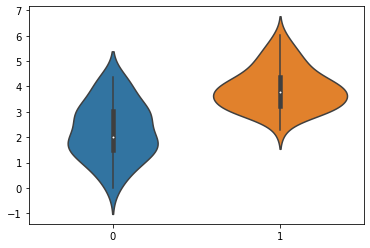

In [5]:
sns.violinplot(data=data)
plt.show()

In [6]:
x_0 = np.concatenate([x1, x2]).reshape((2*N, 1))
y_0 = np.concatenate([np.zeros(N), np.ones(N)]).astype(int)

In [7]:
code = """                                                                                         
data {                                                                                               
  int N; //the number observations                                                                                                                 
  int K; //the number of features                                                                    
  int y[N]; //the response                                                                           
  matrix[N,K] X; //the model matrix  
}                                                                                                    
parameters {                                                                                         
  real alpha;                                                                                        
  vector[K] beta; //the regression parameters                                                        
}                                                                                                    
transformed parameters {                                                                             
  vector[N] linpred;                                                                                 
  linpred = alpha+X*beta; 
  #vector[N] bd;
  #bd = -alpha/beta;
}                                                                                                    
model {                                                                                              
  alpha ~ normal(0,10); //prior for the intercept following Gelman 2008                              
                                                                                                   
  for(i in 1:K)                                                                                      
    beta[i] ~ normal(0,10);                                                                 
                                                                                                   
  y ~ bernoulli_logit(linpred);                                                                      
}                                                                                                                                                                                                       
"""  

In [8]:
data = {                                                                                             
    'N': 2*N,                                                                                        
    'K': 1,                                                                                        
    'y': y_0,                                                                                     
    'X': x_0                                                                                             
}  

In [9]:
posterior = stan.build(code, data=data, random_seed=1)


Building: 0.4s
Building: 0.5s
Building: 0.7s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 

In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused variable 'error' [-Wunused-variable]
  bool error = false;
       ^
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:57:23: warning: comparison of integers of different signs: 'int' and 'std:

Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:50:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/hmm_check.hpp:33:7: warning: unused variable 'n_transitions' [-Wunused-variable]
  int n_transitions = log_omegas.cols() - 1;
      ^


Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.0s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:96:39: warning: lambda capture 'a' is not used [-Wunused-lambda-capture]
  return make_callback_var(beta_val, [a, b, digamma_ab](auto& vi) mutable

Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.6s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun.hpp:121:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/gp_matern52_cov.hpp:304:10: warning: unused variable 'neg_root_5' [-Wunused

Building: 17.1s
Building: 17.2s
Building: 17.3s
Building: 17.4s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun.hpp:188:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/log_mix.hpp:86:13: warning: unused variable 'N' [-Wunused-variable]
  const

Building: 17.5s
Building: 17.6s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.1s
Building: 18.2s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building: 18.7s
Building: 18.8s
Building: 18.9s
Building: 19.0s
Building: 19.1s
Building: 19.2s
Building: 19.4s
Building: 19.5s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:124:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/matrix_power.hpp:52:24: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'const int' [-Wsign-compare]
  for (size_t i = 2; i <= n; ++i) {
                     ~ ^  ~


Building: 19.6s
Building: 19.7s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:137:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/ordered_constrain.hpp:40:30: warning: comparison of integers of different signs: 'Eigen::Index' (aka 'long') and 'size_t' (aka 'unsigned long') [-Wsign-compare]
  for (Eigen::Index n = 1; n < N; ++n) {
                           ~ ^ ~
In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpst

Building: 19.8s
Building: 19.9s
Building: 20.0s
Building: 20.1s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:158:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/simplex_constrain.hpp:40:30: warning: comparison of integers of different signs: 'Eigen::Index' (aka 'long') and 'size_t' (aka 'unsigned long') [-Wsign-compare]
  for (Eigen::Index k = 0; k < N; ++k) {
                           ~ ^ ~
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/simplex_constrain.hpp:94:30: warning: comparison of integers of different signs: 'Eigen::Index' (aka

Building: 20.2s
Building: 20.3s
Building: 20.5s
Building: 20.6s
Building: 20.7s
Building: 20.8s
Building: 20.9s
Building: 21.0s
Building: 21.1s
Building: 21.2s
Building: 21.3s
Building: 21.5s
Building: 21.6s
Building: 21.7s
Building: 21.8s
Building: 21.9s
Building: 22.0s
Building: 22.1s
Building: 22.2s
Building: 22.3s
Building: 22.4s
Building: 22.5s
Building: 22.6s
Building: 22.7s
Building: 22.9s
Building: 23.0s
Building: 23.1s
Building: 23.2s
Building: 23.3s
Building: 23.4s
Building: 23.5s
Building: 23.6s
Building: 23.7s
Building: 23.9s
Building: 24.0s
Building: 24.1s
Building: 24.2s
Building: 24.3s
Building: 24.4s
Building: 24.5s
Building: 24.6s
Building: 24.7s
Building: 24.9s
Building: 25.0s
Building: 25.1s
Building: 25.2s
Building: 25.3s
Building: 25.4s
Building: 25.6s
Building: 25.7s
Building: 25.8s
Building: 25.9s
Building: 26.0s
Building: 26.1s
Building: 26.3s
Building: 26.4s
Building: 26.5s
Building: 26.6s
Building: 26.7s
Building: 26.8s
Building: 26.9s
Building: 27.0s
Building

In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:11:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor.hpp:16:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor/dae.hpp:5:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor/idas_integrator.hpp:5:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor/idas_service.hpp:93:28: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'int' [-Wsign-compare]
    for (size_t is = 0; is < ns; +

Building: 27.3s
Building: 27.4s
Building: 27.5s
Building: 27.6s
Building: 27.7s
Building: 27.8s
Building: 27.9s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:87:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/double_exponential_cdf.hpp:77:10: warning: unused variable 'N' [-Wunused-variable]
  size_t N = max_size(y, mu, sigma);
         ^


Building: 28.1s
Building: 28.2s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:41:21: warning: comparison of integers of different signs: 'int' and 'size_t' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < M; i++) {
                  ~ ^ ~
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7:

Building: 28.3s
Building: 28.4s
Building: 28.5s
Building: 28.6s
Building: 28.7s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:139:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/hmm_marginal.hpp:26:13: warning: unused variable 'n_states' [-Wunused-variable]
  const int n_states = omegas.rows();
            ^


Building: 28.8s
Building: 29.0s
Building: 29.1s
Building: 29.2s
Building: 29.3s
Building: 29.4s
Building: 29.5s
Building: 29.6s
Building: 29.7s
Building: 29.8s
Building: 30.0s
Building: 30.1s
Building: 30.2s
Building: 30.3s
Building: 30.4s
Building: 30.5s
Building: 30.6s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:308:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_lccdf.hpp:78:13: warning: unused variable 'size_sigma' [-Wunused-variable]
  const int size_sigma = stan::math::size(sigma);
            ^
In 

Building: 30.7s
Building: 30.8s
Building: 31.0s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:7:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/io/dump.hpp:694:52: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<double>::size_type' (aka 'unsigned long') [-Wsign-compare]
      for (comp_iter = 0, real_iter = 0; real_iter < val_r->second.first.size();
                                         ~~~~~~~~~ ^ ~~~~~~~~~~~~~~~~~~~~~~~~~~
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/io/dump.hpp:707:24: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int>::size_type' (aka 'unsigned long') [-Wsign-compare]
             real_iter < val_i->second.first.size();
             ~~~~~~~~~ ^ ~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq

Building: 31.1s
Building: 31.2s
Building: 31.3s
Building: 31.4s
Building: 31.5s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:17:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing.hpp:6:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign.hpp:274:21: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int>::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < idx.ns_.size(); ++i) {
                  ~ ^ ~~~~~~~~~~~~~~
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign.hpp:528:21: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int>::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < col_idx.ns_.size(); ++i) {
                  ~ ^ ~~~~~~~~~~~~~~~~~~
/usr/local/lib/python3.9/site-packages/https

Building: 31.6s
Building: 31.8s
Building: 31.9s
Building: 32.0s
Building: 32.1s
Building: 32.2s
Building: 32.4s
Building: 32.5s
Building: 32.6s
Building: 32.7s
Building: 32.8s
Building: 32.9s
Building: 33.0s
Building: 33.1s
Building: 33.2s
Building: 33.4s
Building: 33.5s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:29:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_divide_equal.hpp:5:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_division.hpp:14:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_subtraction.hpp:84:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += 

Building: 33.6s
Building: 33.7s
Building: 33.8s
Building: 33.9s
Building: 34.0s
Building: 34.1s
Building: 34.3s
Building: 34.4s
Building: 34.5s
Building: 34.6s
Building: 34.7s
Building: 34.8s
Building: 35.0s
Building: 35.1s
Building: 35.2s
Building: 35.3s
Building: 35.4s
Building: 35.5s
Building: 35.6s
Building: 35.7s
Building: 35.9s
Building: 36.0s
Building: 36.1s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/grad_inc_beta.hpp:45:43: note: in instantiation of function template specialization 'stan::math::operator+<int, nullptr>' requested here
    gr

Building: 36.2s
Building: 36.3s
Building: 36.4s
Building: 36.5s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/trigamma.hpp:63:31: note: in instantiation of function template specialization 'stan::math::operator+<double, nullptr>' requested here
    val

Building: 36.7s
Building: 36.8s
Building: 36.9s
Building: 37.0s
Building: 37.1s
Building: 37.2s
Building: 37.3s
Building: 37.4s
Building: 37.5s
Building: 37.7s
Building: 37.8s
Building: 37.9s
Building: 38.0s
Building: 38.1s
Building: 38.2s
Building: 38.3s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_not_nan.hpp:5:
/usr/local/lib/python3.9

Building: 38.4s
Building: 38.6s
Building: 38.7s
Building: 38.8s
Building: 38.9s
Building: 39.0s
Building: 39.1s
Building: 39.2s
Building: 39.3s
Building: 39.4s
Building: 39.6s
Building: 39.7s
Building: 39.8s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_not_nan.hpp:5:
/usr/local/lib/python3.9

Building: 39.9s
Building: 40.0s
Building: 40.1s
Building: 40.2s
Building: 40.4s


In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:58:
/usr/local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/set_zero_all_adjoints.hpp:14:13: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
static void set_zero_all_adjoints() {
            ^
In file included from /Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.cpp:2:
In file included from /usr/local/lib/python3.9/site-packages/httpstan/inc

Building: 40.5s
Building: 40.6s
Building: 40.7s
Building: 40.8s
Building: 40.9s
Building: 41.0s
Building: 41.1s
Building: 41.2s
Building: 41.4s
Building: 41.5s
Building: 41.6s
Building: 41.7s
Building: 41.8s
Building: 41.9s
Building: 42.0s
Building: 42.1s
Building: 42.2s
Building: 42.3s
Building: 42.4s
Building: 42.6s
Building: 42.7s
Building: 42.8s
Building: 42.9s
Building: 43.0s
Building: 43.1s
Building: 43.2s
Building: 43.3s
Building: 43.5s
Building: 43.6s
Building: 43.7s
Building: 43.8s
Building: 43.9s
Building: 44.0s
Building: 44.1s
Building: 44.2s
Building: 44.3s
Building: 44.4s
Building: 44.5s
Building: 44.7s
Building: 44.8s
Building: 44.9s
Building: 45.0s
Building: 45.1s
Building: 45.2s
Building: 45.3s
Building: 45.4s
Building: 45.5s
Building: 45.6s
Building: 45.7s
Building: 45.9s
Building: 46.0s
Building: 46.1s
Building: 46.2s
Building: 46.3s
Building: 46.4s
Building: 46.5s
Building: 46.6s
Building: 46.7s
Building: 46.8s
Building: 47.0s
Building: 47.1s
Building: 47.2s
Building

62 warnings generated.


Building: 58.4s
Building: 58.5s
Building: 58.6s
Building: 58.8s


ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/usr/local/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-11-x86_64-3.9/Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/usr/local/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::P2' from file 'build/temp.macosx-11-x86_64-3.9/Users/claudiahm/Library/Caches/httpstan/4.7.2/models/kalyq7h2/model_kalyq7h2.o' means the weak symbol cannot

Messages from stanc:
Warning in '/var/folders/79/lndg0b5n2q3b40m_ty2kxlm40000gn/T/httpstan_06hv8nbu/model_kalyq7h2.stan', line 5, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/79/lndg0b5n2q3b40m_ty2kxlm40000gn/T/httpstan_06hv8nbu/model_kalyq7h2.stan', line 15, column 2: Comments
    beginning with # are deprecated and this syntax will be removed in Stan
    2.32.0. Use // to begin line comments; this can be done automatically
    using the auto-format flag to stanc
Warning in '/var/folders/79/lndg0b5n2q3b40m_ty2kxlm40000gn/T/httpstan_06hv8nbu/model_kalyq7h2.stan', line 16, column 2: Comments
    beginning with # are deprecated and this syntax will be removed in Stan
    2.32.0. Use // to begin line comments; this can be done automatically
    using the a

In [10]:
fit = posterior.sample(num_chains=2, num_samples=1000)


Sampling:   0%
Sampling:  20% (800/4000)
Sampling:  70% (2800/4000)
Sampling: 100% (4000/4000)
Sampling: 100% (4000/4000), done.
Messages received during sampling:
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!


In [11]:
df = fit.to_frame()  # pandas `DataFrame, requires pandas
print(df.describe().T)

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           2000.0 -43.236878  0.994786 -49.302143 -43.606624 -42.951479   
accept_stat__  2000.0   0.943033  0.085490   0.301009   0.925674   0.978501   
stepsize__     2000.0   0.136955  0.012704   0.124255   0.124255   0.136955   
treedepth__    2000.0   2.727500  0.981695   1.000000   2.000000   3.000000   
n_leapfrog__   2000.0  11.645000  8.990127   1.000000   3.000000   7.000000   
...               ...        ...       ...        ...        ...        ...   
linpred.96     2000.0   0.909920  0.311874   0.083799   0.692632   0.894783   
linpred.97     2000.0  -1.637033  0.457582  -3.559338  -1.937750  -1.602610   
linpred.98     2000.0   1.379755  0.367030   0.446068   1.122692   1.369133   
linpred.99     2000.0  -0.163948  0.282245  -1.088981  -0.356610  -0.163547   
linpred.100    2000.0   3.136659  0.659679   1.39921

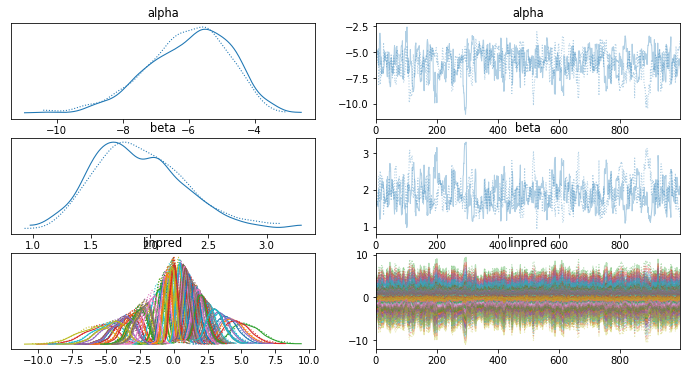

In [12]:
az.plot_trace(fit)
plt.show()

## 2. Binary bivariate classification

In [13]:
data_1 = np.random.normal([2.5,2.5],[1,1], [50,2])
data1_x = data_1[:,0]
data1_y = data_1[:,1]

data_2 = np.random.normal([4,4],[1,1], [50,2])
data2_x = data_2[:,0]
data2_y = data_2[:,1]

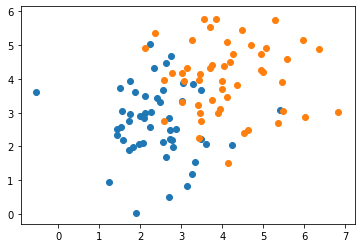

In [14]:
plt.scatter(data1_x, data1_y)
plt.scatter(data2_x, data2_y)
plt.show()

In [15]:
N = 50

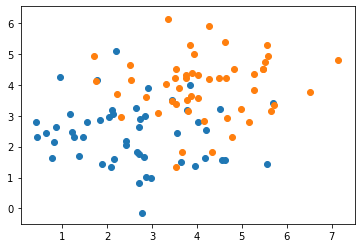

In [16]:
x1 = np.random.normal([2.5,2.5],[1,1], [N,2])
x2 = np.random.normal([4,4],[1,1], [50,2])
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.show()

In [17]:
x_0 = np.concatenate([x1, x2])
y_0 = np.concatenate([np.zeros(N), np.ones(N)]).astype(int)

In [18]:
code = """                                                                                         
data {                                                                                               
  int N; //the number observations                                                                                                                 
  int K; //the number of features                                                                    
  int y[N]; //the response                                                                           
  matrix[N,K] X; //the model matrix                                                                  
}                                                                                                    
parameters {                                                                                         
  real alpha;                                                                                        
  vector[K] beta; //the regression parameters                                                        
}                                                                                                    
transformed parameters {                                                                             
  vector[N] linpred;                                                                                 
  linpred = alpha+X*beta;                                                                            
}                                                                                                    
model {                                                                                              
  alpha ~ normal(0,10); //prior for the intercept following Gelman 2008                              
                                                                                                   
  for(i in 1:K)                                                                                      
    beta[i] ~ normal(0,10);                                                                 
                                                                                                   
  y ~ bernoulli_logit(linpred);                                                                      
}                                                                                                                                                                                                       
"""  

In [19]:
data = {                                                                                             
    'N': 2*N,                                                                                        
    'K': 2,                                                                                        
    'y': y_0,                                                                                     
    'X': x_0                                                                                             
}  

In [20]:
posterior = stan.build(code, data=data, random_seed=1)


Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/79/lndg0b5n2q3b40m_ty2kxlm40000gn/T/httpstan_ryt1tp_e/model_aezd2xva.stan', line 5, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc


In [21]:
fit = posterior.sample(num_chains=2, num_samples=1000)


Sampling:   0%
Sampling:   2% (100/4000)
Sampling:   5% (200/4000)
Sampling:  20% (800/4000)
Sampling:  38% (1500/4000)
Sampling:  70% (2800/4000)
Sampling: 100% (4000/4000)
Sampling: 100% (4000/4000), done.
Messages received during sampling:
  Gradient evaluation took 6.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!


In [22]:
df = fit.to_frame()  # pandas `DataFrame, requires pandas
print(df.describe().T)

                count       mean        std        min        25%        50%  \
parameters                                                                     
lp__           2000.0 -37.752935   1.361040 -48.003814 -38.305527 -37.409167   
accept_stat__  2000.0   0.916571   0.121163   0.154296   0.888819   0.968232   
stepsize__     2000.0   0.162202   0.015960   0.146246   0.146246   0.162202   
treedepth__    2000.0   3.440000   1.025634   1.000000   3.000000   4.000000   
n_leapfrog__   2000.0  17.401000  10.339954   1.000000   7.000000  15.000000   
...               ...        ...        ...        ...        ...        ...   
linpred.96     2000.0   6.643399   1.405128   2.543987   5.678471   6.508605   
linpred.97     2000.0   3.665682   0.784435   1.413284   3.131491   3.599368   
linpred.98     2000.0   4.401862   1.020634   1.407134   3.679661   4.331459   
linpred.99     2000.0   3.793263   0.868990   1.288167   3.202361   3.731052   
linpred.100    2000.0   4.806409   1.022

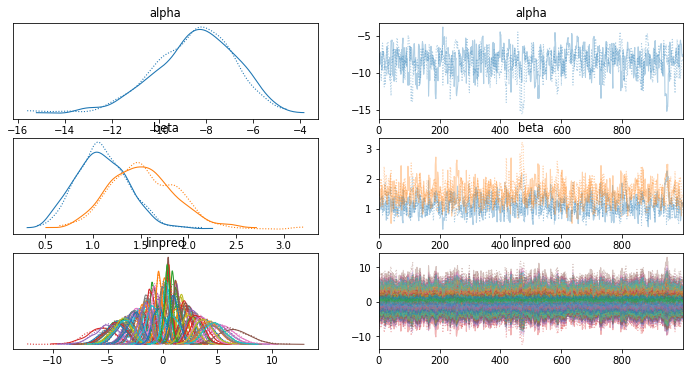

In [23]:
az.plot_trace(fit)
plt.show()